In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### DATA UNDERSTANDING

In [2]:
## DATA UNDERSTANDING
raw_credit = pd.read_csv('C:/Users/user/Desktop/Predicting_credit_cards/credit_record.csv')
print(raw_credit.head())
print(raw_credit.shape,raw_credit.info())

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
(1048575, 3) None


In [3]:
raw_application = pd.read_csv('C:/Users/user/Desktop/Predicting_credit_cards/application_record.csv')
print(raw_application.head())
print(raw_application.shape)

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 


ID : Client number	

CODE_GENDER	: Gender	

FLAG_OWN_CAR : Is there a car	

FLAG_OWN_REALTY	: Is there a property	

CNT_CHILDREN : Number of children	

AMT_INCOME_TOTAL : Annual income

NAME_INCOME_TYPE : Income category	

NAME_EDUCATION_TYPE	: Education level	

NAME_FAMILY_STATUS	: Marital status	

NAME_HOUSING_TYPE	: Way of living	

DAYS_BIRTH	: Birthday	,Count backwards from current day (0), -1 means yesterday

DAYS_EMPLOYED	: Start date of employment	,Count backwards from current day(0). If positive, it means the person currently unemployed.

FLAG_MOBIL	: Is there a mobile phone	

FLAG_WORK_PHONE	: Is there a work phone	

FLAG_PHONE	: Is there a phone	

FLAG_EMAIL	: Is there an email	

OCCUPATION_TYPE	: Occupation	

CNT_FAM_MEMBERS	: Family size	

MONTHS_BALANCE	: Record month	,The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

STATUS	: Status ,	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [4]:
df = raw_application.merge(raw_credit, on='ID', how='inner')
print(df.shape)
print(df.sample(5))

(777715, 20)
             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
65836   5022738           F            N               Y             0   
461881  5091364           F            N               Y             0   
242636  5048342           F            N               N             0   
721552  5143138           M            N               N             0   
760835  5149764           F            N               Y             1   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
65836            90000.0             Pensioner  Secondary / secondary special   
461881           90000.0             Pensioner  Secondary / secondary special   
242636          157500.0               Working               Higher education   
721552          112500.0  Commercial associate  Secondary / secondary special   
760835          180000.0         State servant  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_B

In [5]:
df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,7.777150e+05,777715,777715,777715,777715.000000,7.777150e+05,777715,777715,777715,777715,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,537667,777715.000000,777715.000000,777715
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,8
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,C
freq,NaN,518851,473355,512948,NaN,NaN,400164,524261,546619,697151,NaN,NaN,NaN,NaN,NaN,NaN,131572,NaN,NaN,329536
mean,5.078743e+06,NaN,NaN,NaN,0.428082,1.885348e+05,NaN,NaN,NaN,NaN,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,NaN,2.208837,-19.373564,NaN
std,4.180442e+04,NaN,NaN,NaN,0.745755,1.016225e+05,NaN,NaN,NaN,NaN,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,NaN,0.907380,14.082208,NaN
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,-60.000000,NaN
25%,5.044568e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-29.000000,NaN
50%,5.069530e+06,NaN,NaN,NaN,0.000000,1.620000e+05,NaN,NaN,NaN,NaN,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-17.000000,NaN
75%,5.115551e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,-8.000000,NaN


### DATA CLEANING

In [6]:
### cleaning
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [7]:
print(df['OCCUPATION_TYPE'].nunique())
df.fillna('Others',axis=1,inplace=True)
print(df['OCCUPATION_TYPE'].nunique())

18
19


In [8]:
print(df.isnull().sum())
df.shape

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


(777715, 20)

In [9]:
df.duplicated().sum()

0

In [10]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [11]:
### Drop unnecessary data
df.drop(['FLAG_MOBIL'],axis=1,inplace=True)
# Min and Max same number no use


### EDA

In [12]:
df = df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Nbchildren',
                               'AMT_INCOME_TOTAL':'Total_income_per_year','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_level','NAME_FAMILY_STATUS':'Marital_status',
                               'NAME_HOUSING_TYPE':'Way_of_living','FLAG_WORK_PHONE':'Workphone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation',
                               'CNT_FAM_MEMBERS':'Nbfamily_member'})

In [13]:
### DEALING WITH NUMERICAL COLUMNS
numeric_cols = df.select_dtypes(include='number')
print(numeric_cols.columns)

Index(['ID', 'Nbchildren', 'Total_income_per_year', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'Workphone', 'Phone', 'Email', 'Nbfamily_member',
       'MONTHS_BALANCE'],
      dtype='object')


0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: Nbchildren, dtype: int64



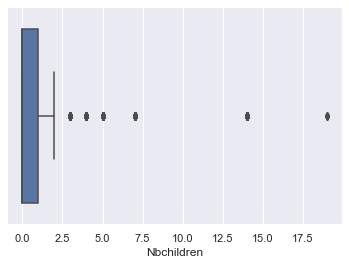

In [14]:
sns.boxplot(x=df["Nbchildren"]) ### correlated with number of family_member
print(df['Nbchildren'].value_counts().sort_values(ascending=False))
print()


In [15]:
number_Children_outlier = df['Nbchildren'].quantile(0.99)
df = df[df['Nbchildren'] < number_Children_outlier]

135000.0    88953
180000.0    67183
157500.0    61718
225000.0    61127
112500.0    60577
            ...  
51750.0         7
89550.0         5
594000.0        4
151200.0        2
134995.5        2
Name: Total_income_per_year, Length: 262, dtype: int64



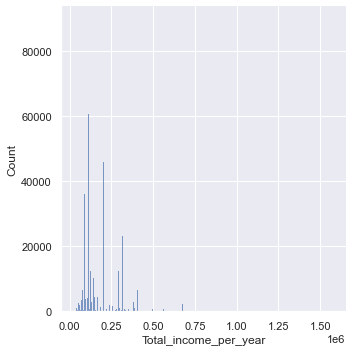

In [16]:
sns.displot(df, x="Total_income_per_year")
print(df['Total_income_per_year'].value_counts().sort_values(ascending=False))
print()

In [17]:
Total_income_per_year_outlier = df['Total_income_per_year'].quantile(0.99)
df = df[df['Total_income_per_year'] < Total_income_per_year_outlier]

2.0    420140
1.0    140078
3.0    132697
4.0     65973
Name: Nbfamily_member, dtype: int64


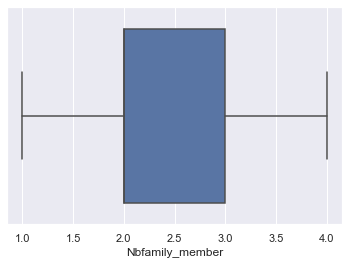

In [18]:
sns.boxplot(x=df["Nbfamily_member"])
print(df['Nbfamily_member'].value_counts().sort_values(ascending=False))

### might have high correlation with Number of children

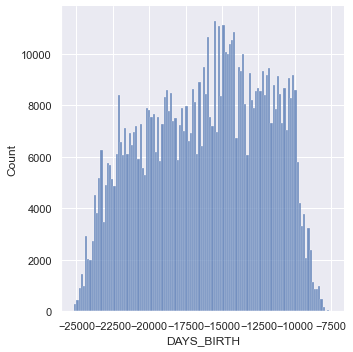

In [19]:
sns.displot(df,x='DAYS_BIRTH')


<AxesSubplot:xlabel='DAYS_EMPLOYED'>

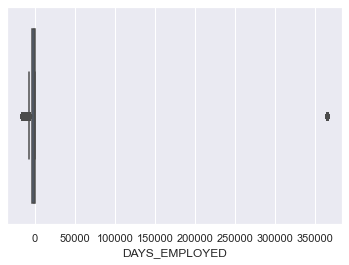

In [20]:
sns.boxplot(x=df['DAYS_EMPLOYED'])


In [21]:
df['DAYS_BIRTH']

0        -12005
1        -12005
2        -12005
3        -12005
4        -12005
          ...  
777710    -9188
777711    -9188
777712    -9188
777713    -9188
777714    -9188
Name: DAYS_BIRTH, Length: 758888, dtype: int64

In [22]:
## DEALING WITH NUMERICAL COLUMNS
def Categorical_countplot(features):
    for categorical_columns in features:
        plt.figure(figsize=(12, 12))
        ax=sns.countplot(y=df[categorical_columns], hue='Gender' , data=df)
        plt.legend(loc='best')
        total = len(df[categorical_columns])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

In [23]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
print(categorical_columns.columns)

Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'STATUS'],
      dtype='object')


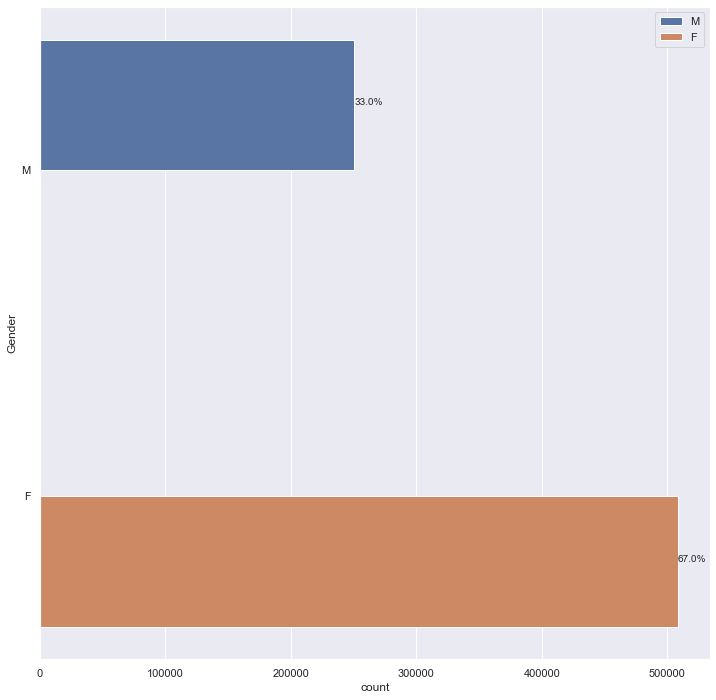

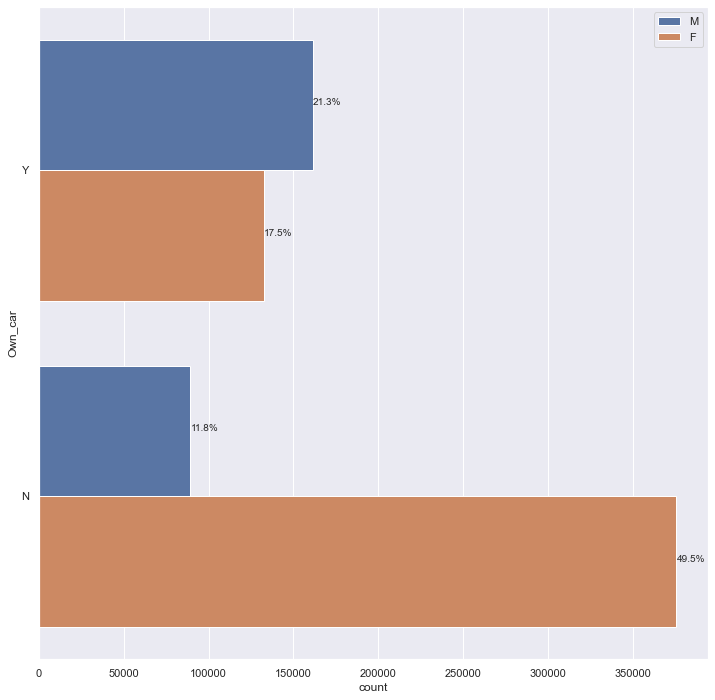

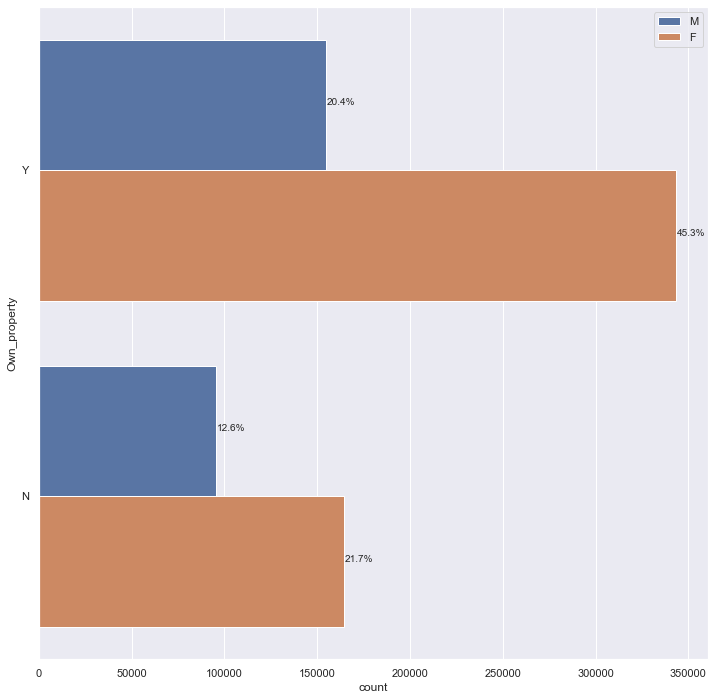

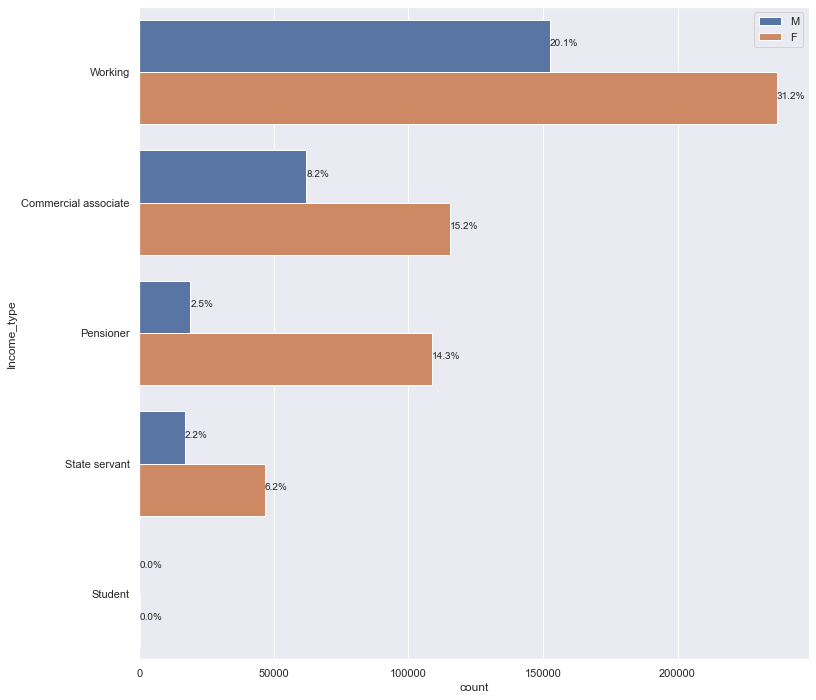

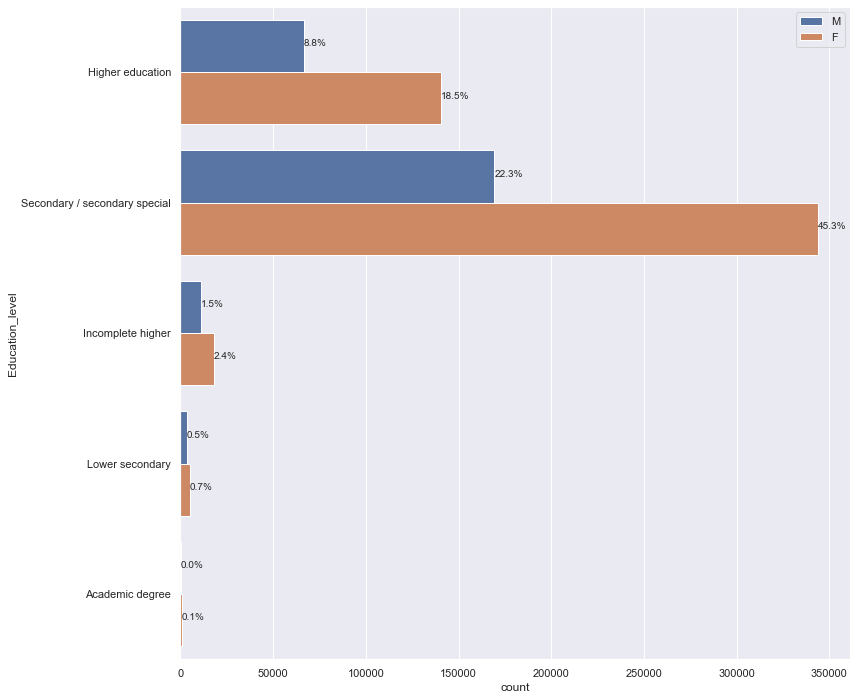

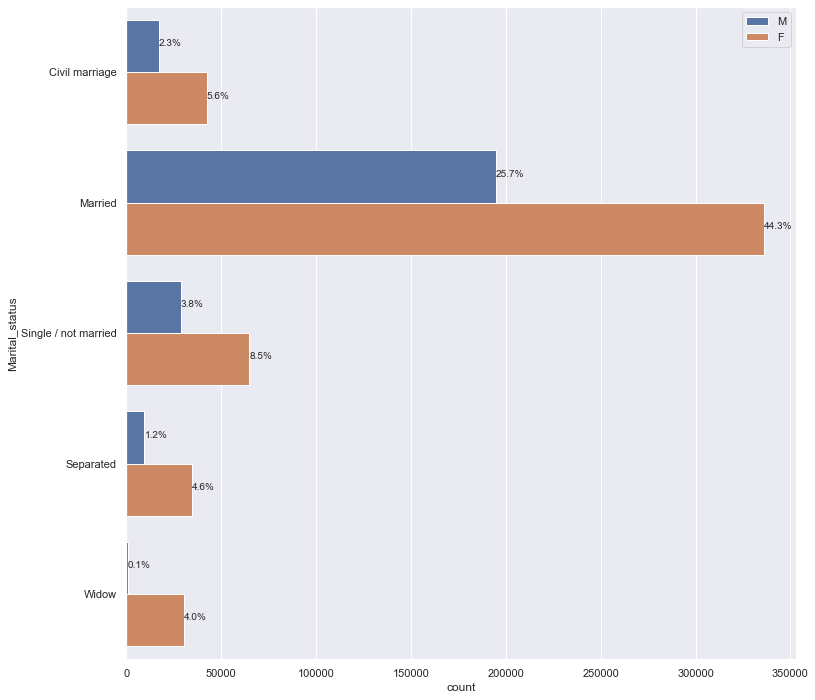

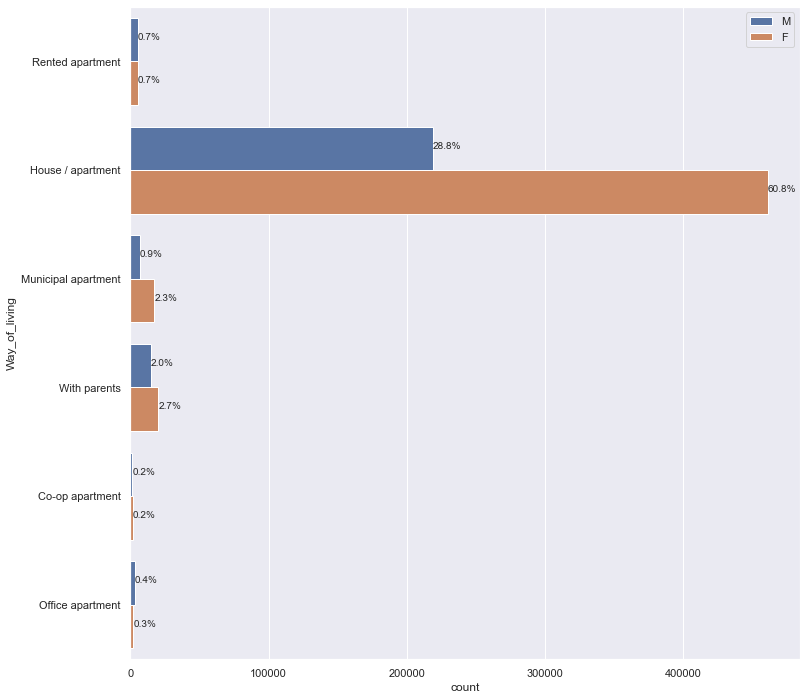

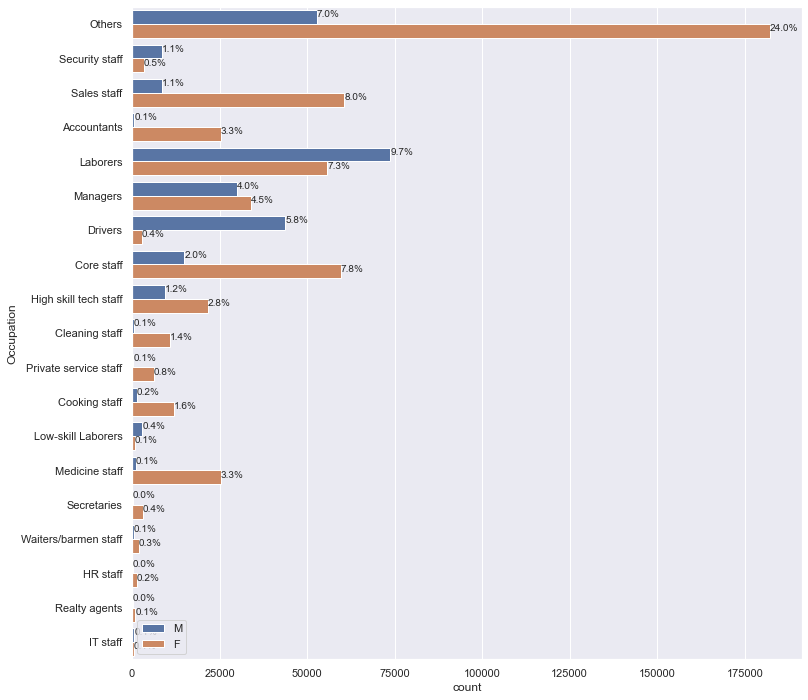

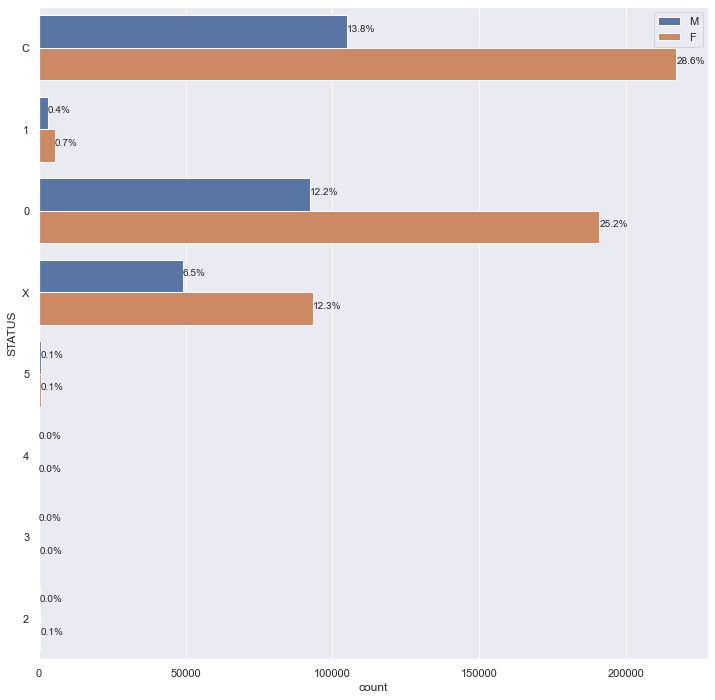

In [24]:
Categorical_countplot(['Gender','Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'STATUS'])

### Feature engineering

In [25]:
### Feature engineering


In [26]:
def convert_day_to_year(days):
    days = round(days/-365,0)
    return days

In [27]:
df

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,DAYS_BIRTH,DAYS_EMPLOYED,Workphone,Phone,Email,Occupation,Nbfamily_member,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-12,0


In [28]:
df['Age'] = df['DAYS_BIRTH'].apply(convert_day_to_year)
df['Age'] = df['Age'].astype(int)
df['Experience'] = df['DAYS_EMPLOYED'].apply(convert_day_to_year)
df['Total_income_lifetime_employed'] = df['Experience'] * df['Total_income_per_year']
df['Working_year_proportion'] = df['Experience'] / df['Age']

df.drop('DAYS_BIRTH',axis=1,inplace=True)
df.drop('DAYS_EMPLOYED',axis=1,inplace=True)

<AxesSubplot:>

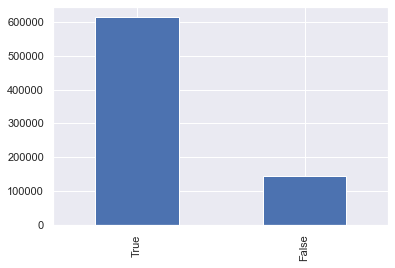

In [29]:
(df['Experience'] > 0).value_counts().plot(kind="bar")
### True is number of people who unemployment

In [30]:
def employment_status(date):
    # Determine the employment status based on the duration
    if date < 0:
        return "Unemployed"
    else:
        return "Employment"

In [31]:
df['Employment_status'] = df['Experience'].apply(employment_status)

<AxesSubplot:ylabel='Employment_status'>

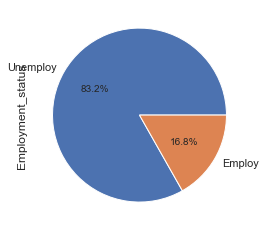

In [32]:
df['Employment_status'].value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Unemploy","Employ"])
## 83.2 percent of people are unemployed while only 16.8 percent are employed

In [33]:
df['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
df['STATUS']=df['STATUS'].astype(int)

In [34]:
def Risk_evaluation(score):
    risk_range = [2,3,4,5]
    if score in risk_range:
        return '1'
    else:
        return '0'


## 1 risk 0 No 

0    0.996386
1    0.003614
Name: Risk, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


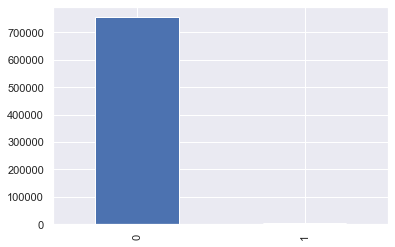

In [35]:
df['Risk'] = df['STATUS'].apply(Risk_evaluation)
print(df['Risk'].value_counts(normalize=True))
print(df['Risk'].value_counts().plot(kind='bar'))
## Imbalance dataset


### DATA VISUALIZING

In [36]:
df

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,...,Occupation,Nbfamily_member,MONTHS_BALANCE,STATUS,Age,Experience,Total_income_lifetime_employed,Working_year_proportion,Employment_status,Risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Others,2.0,0,6,33,12.0,5130000.0,0.363636,Employment,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Others,2.0,-1,6,33,12.0,5130000.0,0.363636,Employment,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Others,2.0,-2,6,33,12.0,5130000.0,0.363636,Employment,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Others,2.0,-3,6,33,12.0,5130000.0,0.363636,Employment,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Others,2.0,-4,6,33,12.0,5130000.0,0.363636,Employment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,Laborers,1.0,-9,0,25,3.0,337500.0,0.120000,Employment,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,Laborers,1.0,-10,2,25,3.0,337500.0,0.120000,Employment,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,Laborers,1.0,-11,1,25,3.0,337500.0,0.120000,Employment,0
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,Laborers,1.0,-12,0,25,3.0,337500.0,0.120000,Employment,0


In [37]:
columns = df.columns
columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Nbchildren',
       'Total_income_per_year', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'Age',
       'Experience', 'Total_income_lifetime_employed',
       'Working_year_proportion', 'Employment_status', 'Risk'],
      dtype='object')

In [38]:
### drop unnecessary columns
df = df.drop(columns=['ID'])

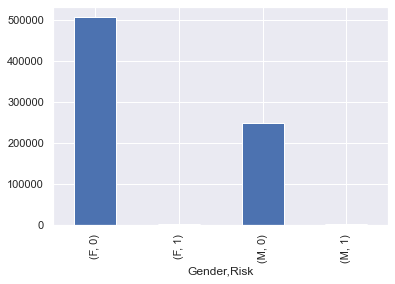

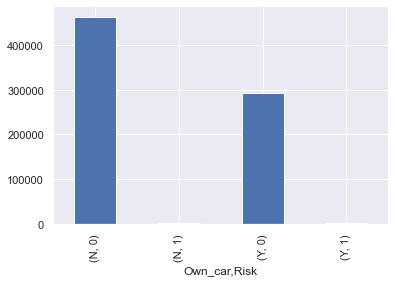

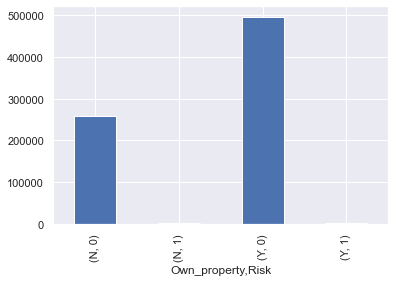

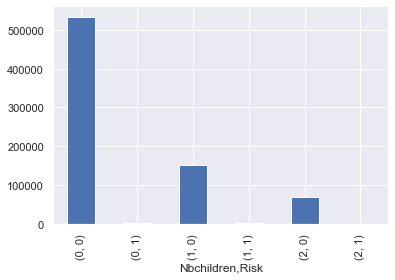

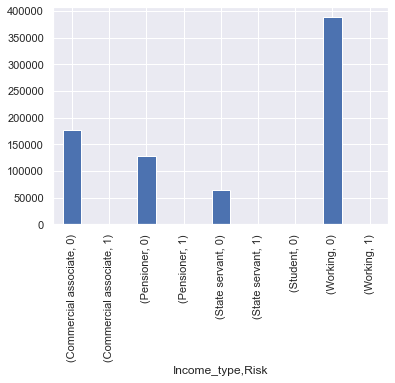

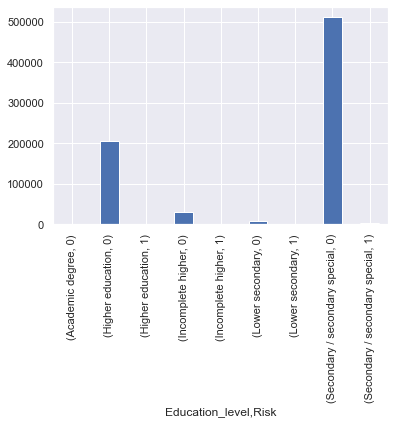

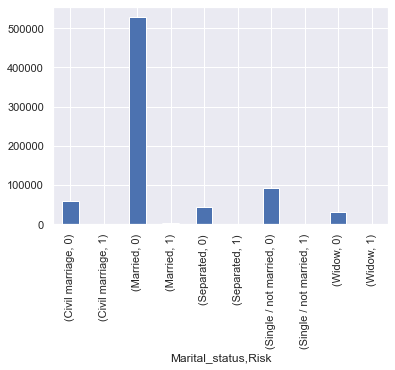

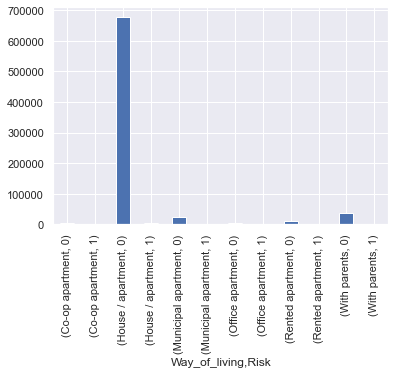

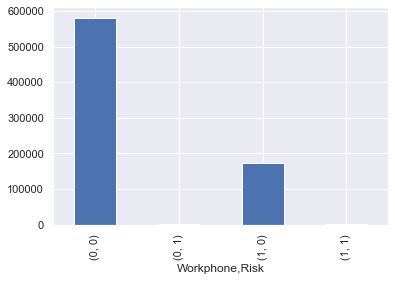

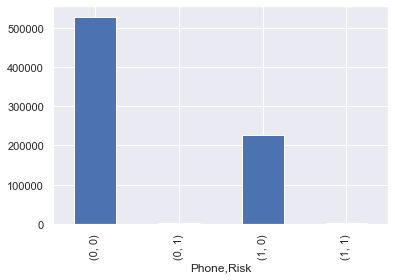

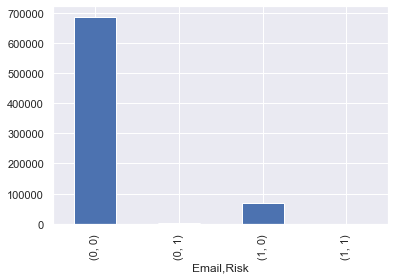

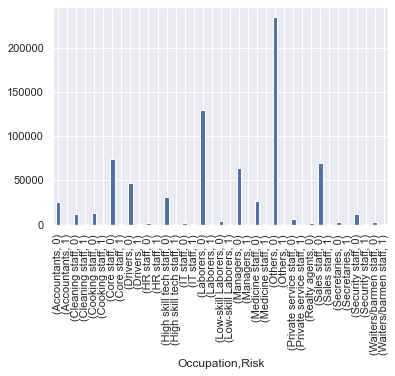

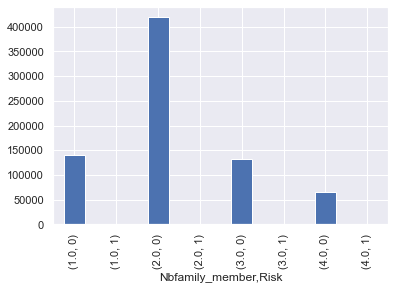

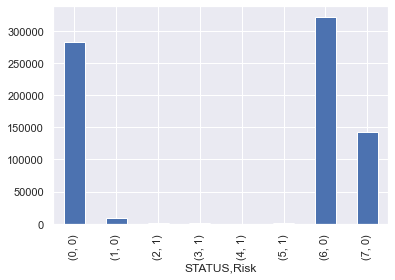

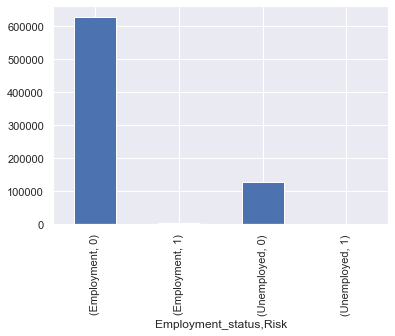

In [39]:
column = ['Gender', 'Own_car', 'Own_property', 'Nbchildren',
        'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Nbfamily_member', 'STATUS','Employment_status']
for variable in column:
    df.groupby(variable)['Risk'].value_counts().plot(kind='bar')
    plt.show()


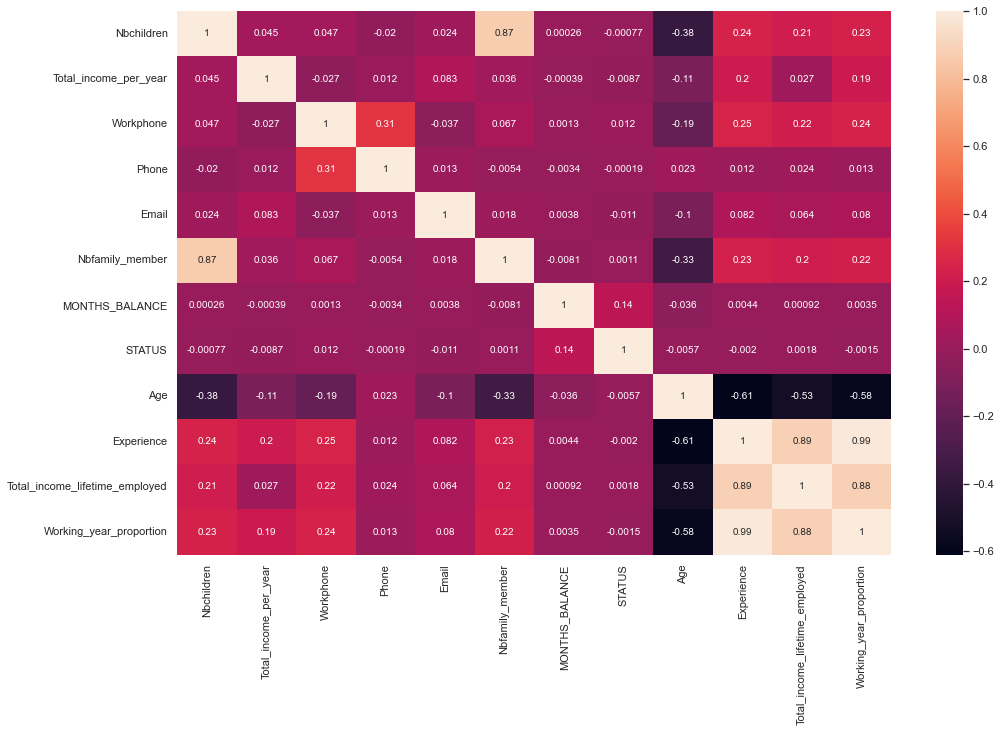

In [40]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [41]:
df.corr().columns

Index(['Nbchildren', 'Total_income_per_year', 'Workphone', 'Phone', 'Email',
       'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'Age', 'Experience',
       'Total_income_lifetime_employed', 'Working_year_proportion'],
      dtype='object')

In [42]:
### checking multicollinearity VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
variables_con = df[['Nbchildren', 'Total_income_per_year', 'Workphone', 'Phone', 'Email',
       'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'Age', 'Experience',
       'Total_income_lifetime_employed','Working_year_proportion']]
vif_con = pd.DataFrame()

In [43]:
vif_con["VIF"] = [variance_inflation_factor(variables_con.values, i) for i in range(variables_con.shape[1])]
vif_con["features"] = variables_con.columns

In [44]:
vif_con

### In case of using logistic regression

,VIF,features
0,5.139388,Nbchildren
1,5.987069,Total_income_per_year
2,1.544066,Workphone
3,1.599815,Phone
4,1.114729,Email
5,22.269227,Nbfamily_member
6,2.871281,MONTHS_BALANCE
7,2.546340,STATUS
8,16.715262,Age
9,79.944027,Experience


### DATA PREPROCESSING

In [45]:
df.columns

Index(['Gender', 'Own_car', 'Own_property', 'Nbchildren',
       'Total_income_per_year', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Nbfamily_member', 'MONTHS_BALANCE', 'STATUS', 'Age',
       'Experience', 'Total_income_lifetime_employed',
       'Working_year_proportion', 'Employment_status', 'Risk'],
      dtype='object')

In [46]:
df['Risk'] = df['Risk'].astype('int')

In [47]:
dummies_data = pd.get_dummies(df[df.columns[df.dtypes==object]])
data_encoded = pd.concat([dummies_data, df[df.columns[df.dtypes != object]]],axis=1)
data_encoded

,Gender_F,Gender_M,Own_car_N,Own_car_Y,Own_property_N,Own_property_Y,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,...,Phone,Email,Nbfamily_member,MONTHS_BALANCE,STATUS,Age,Experience,Total_income_lifetime_employed,Working_year_proportion,Risk
0,0,1,0,1,0,1,0,0,0,0,...,0,0,2.0,0,6,33,12.0,5130000.0,0.363636,0
1,0,1,0,1,0,1,0,0,0,0,...,0,0,2.0,-1,6,33,12.0,5130000.0,0.363636,0
2,0,1,0,1,0,1,0,0,0,0,...,0,0,2.0,-2,6,33,12.0,5130000.0,0.363636,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,2.0,-3,6,33,12.0,5130000.0,0.363636,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,2.0,-4,6,33,12.0,5130000.0,0.363636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,0,1,1,0,0,1,0,0,0,0,...,0,0,1.0,-9,0,25,3.0,337500.0,0.120000,0
777711,0,1,1,0,0,1,0,0,0,0,...,0,0,1.0,-10,2,25,3.0,337500.0,0.120000,1
777712,0,1,1,0,0,1,0,0,0,0,...,0,0,1.0,-11,1,25,3.0,337500.0,0.120000,0
777713,0,1,1,0,0,1,0,0,0,0,...,0,0,1.0,-12,0,25,3.0,337500.0,0.120000,0


In [48]:
X = data_encoded.drop(['Risk'],axis=1)
y = data_encoded['Risk']

In [49]:
# data standarization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(X)

In [50]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(x_scaled, y)

In [55]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test = train_test_split(X_balanced,y_balanced,test_size=0.3,random_state=25,shuffle=True)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score

Logit = LogisticRegression()
Logit.fit(x_train, y_train)

print('Logistic Model Accuracy : ', Logit.score(x_test, y_test)*100, '%')

prediction = Logit.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

d:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Model Accuracy :  62.80739805196094 %

Confusion matrix :
[[146646  80330]
 [ 88408 138303]]

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63    226976
           1       0.63      0.61      0.62    226711

    accuracy                           0.63    453687
   macro avg       0.63      0.63      0.63    453687
weighted avg       0.63      0.63      0.63    453687

\ROC_AUC_SCORE report:
0.6280634535346887


In [58]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction = decision_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Decision Tree Model Accuracy :  100.0 %

Confusion matrix :
[[226976      0]
 [     0 226711]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226976
           1       1.00      1.00      1.00    226711

    accuracy                           1.00    453687
   macro avg       1.00      1.00      1.00    453687
weighted avg       1.00      1.00      1.00    453687

\ROC_AUC_SCORE report:
1.0


In [ ]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train, y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test, y_test)*100, '%')

prediction = svc_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

In [ ]:
from sklearn.tree import RandomForestClassifier

decision_model = RandomForestClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction = decision_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))